# Linear Regression Analysis Notebook

## Table of Contents
- Install Dependencies
- Import Libraries
- Load Data
- Data Preprocessing
- Feature Engineering
- Exploratory Data Analysis
- Data Visualization

## Install Dependencies

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

## Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Data

In [33]:
# Load the stock data
df = pd.read_csv('question4-stock-data.csv')
df.head()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


## Data Preprocessing

In [34]:
# Check for missing values
print(f"Missing values in the dataset:\n{df.isnull().sum()}")

Missing values in the dataset:
Unnamed: 0      0
Date          110
Adj Close      93
Close         117
High           95
Low           127
Open          103
Volume        145
dtype: int64


In [35]:
# Forward Fill missing values (propagate previous values)
df.fillna(method='ffill', inplace=True)

# After handling missing values, verify if there are still any missing values
print(f"Missing values after handling:\n{df.isnull().sum()}")

Missing values after handling:
Unnamed: 0    0
Date          0
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume        0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_21900\1760823774.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## Feature Engineering

In [36]:
# Create additional features based on the stock data
df['Price Change'] = df['Close'].pct_change()  # Daily price change
df['Moving Average 7'] = df['Close'].rolling(window=7).mean()  # 7-day moving average
df['Moving Average 30'] = df['Close'].rolling(window=30).mean()  # 30-day moving average
df['High-Low'] = df['High'] - df['Low']  # Daily high-low difference
df['Open-Close'] = df['Open'] - df['Close']  # Difference between open and close prices

# Drop rows with missing values after feature engineering
df.dropna(inplace=True)

In [37]:
df.head(50)

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume,Price Change,Moving Average 7,Moving Average 30,High-Low,Open-Close
29,29,1980-04-28,2.502202,3.585565,3.639081,3.585565,0.000000,2803.0,0.011321,3.488089,3.374623,0.053516,-3.585565
30,30,1980-04-29,2.539549,3.639081,3.692597,3.639081,0.000000,74744.0,0.014925,3.518670,3.386218,0.053516,-3.639081
31,31,1980-04-30,2.548885,3.652460,3.705975,3.652460,0.000000,3737.0,0.003677,3.551162,3.397813,0.053515,-3.652460
32,32,1980-05-01,2.558223,3.665839,3.719354,3.665839,0.000000,934.0,0.003663,3.585565,3.409854,0.053515,-3.665839
33,33,1980-05-02,2.558223,3.665839,3.665839,3.665839,3.665839,0.0,0.000000,3.610412,3.421895,0.000000,0.000000
34,34,1980-05-05,2.576895,3.692597,3.746112,3.692597,0.000000,14015.0,0.007299,3.635258,3.432152,0.053515,-3.692597
35,35,1980-05-06,2.632913,3.772870,3.826386,3.772870,0.000000,5606.0,0.021739,3.667750,3.444640,0.053516,-3.772870
36,36,1980-05-07,2.632913,3.772870,3.772870,3.772870,3.772870,0.0,0.000000,3.694508,3.458018,0.000000,0.000000
37,37,1980-05-08,2.642250,3.786249,3.839765,3.786249,3.772870,7474.0,0.003546,3.715532,3.471843,0.053516,-0.013379
38,38,1980-05-09,2.651587,3.799628,3.853144,3.799628,0.000000,15883.0,0.003534,3.736556,3.487452,0.053516,-3.799628


## Exploratory Data Analysis

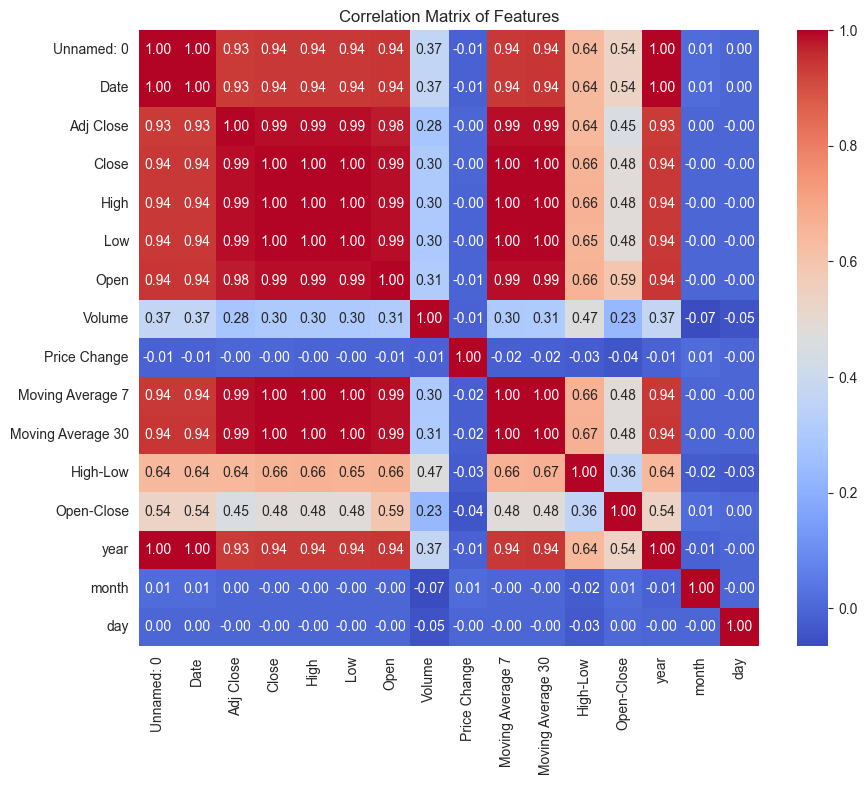

In [64]:
# Visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


## Data Visualization

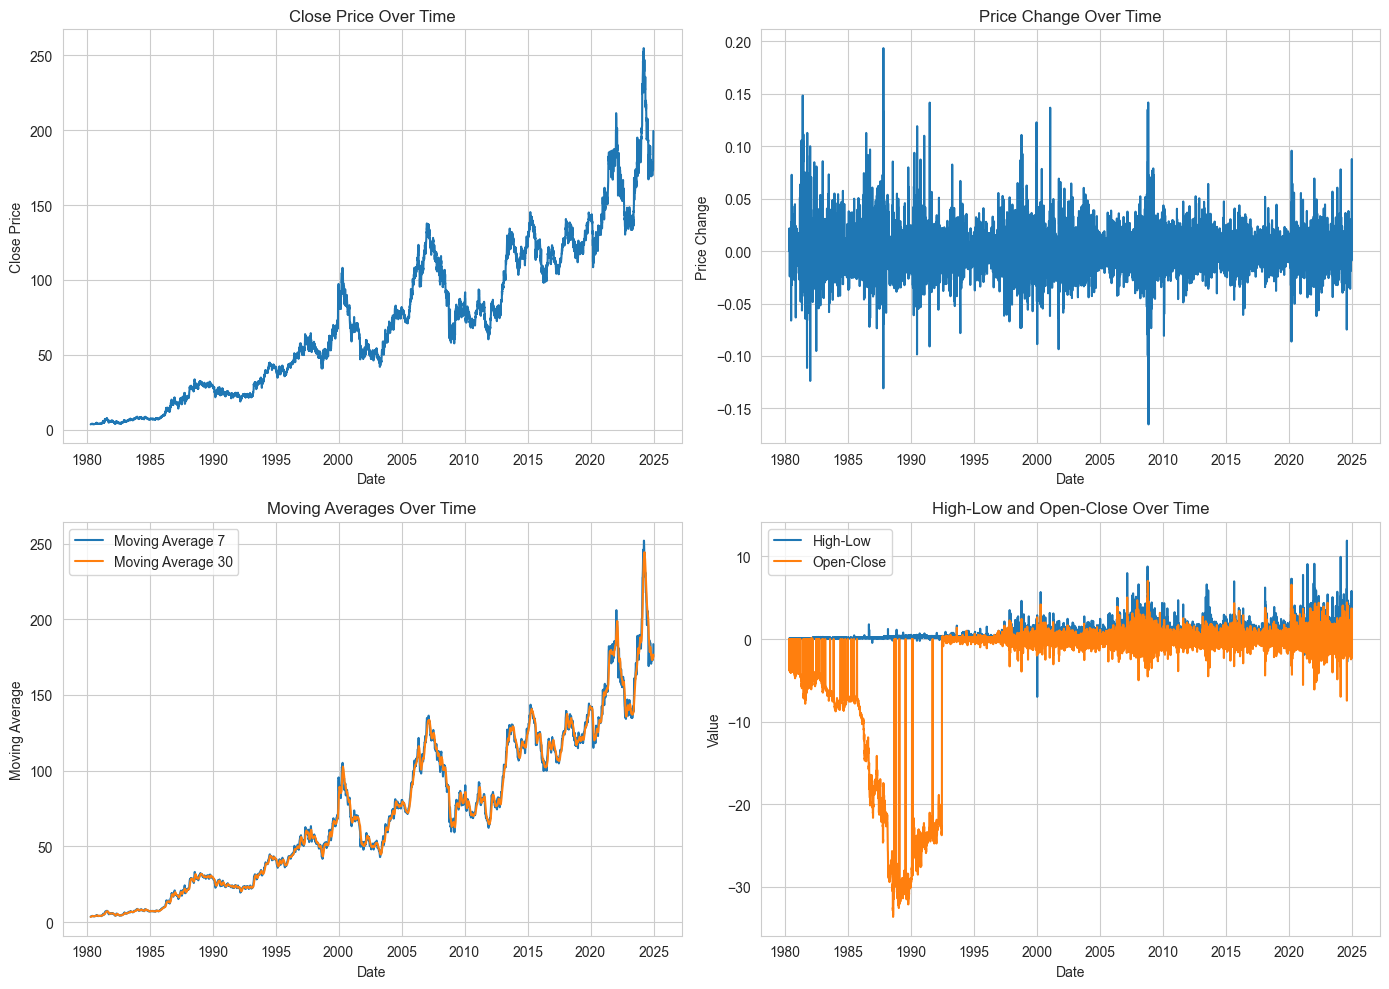

In [72]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: 'Close' Price Over Time
axes[0, 0].plot(df['Date'], df['Close'])
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Close Price')
axes[0, 0].set_title('Close Price Over Time')

# Plot 2: 'Price Change' Over Time
axes[0, 1].plot(df['Date'], df['Price Change'])
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price Change')
axes[0, 1].set_title('Price Change Over Time')

# Plot 3: 'Moving Average 7' and 'Moving Average 30' Over Time
axes[1, 0].plot(df['Date'], df['Moving Average 7'], label='Moving Average 7')
axes[1, 0].plot(df['Date'], df['Moving Average 30'], label='Moving Average 30')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Moving Average')
axes[1, 0].set_title('Moving Averages Over Time')
axes[1, 0].legend()

# Plot 4: 'High-Low' and 'Open-Close' Over Time
axes[1, 1].plot(df['Date'], df['High-Low'], label='High-Low')
axes[1, 1].plot(df['Date'], df['Open-Close'], label='Open-Close')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_title('High-Low and Open-Close Over Time')
axes[1, 1].legend()

# Adjust layout for a cleaner look
plt.tight_layout()
plt.show()


## Data Preparation for Training

In [39]:
# Select features for training
# features = ['Adj Close','Price Change', 'Moving Average 7', 'Moving Average 30', 'High-Low', 'Open-Close']
features = ['Price Change', 'Moving Average 7', 'Moving Average 30', 'High-Low', 'Open-Close']


In [40]:
X = df[features]
y = df['Close']
features

['Price Change',
 'Moving Average 7',
 'Moving Average 30',
 'High-Low',
 'Open-Close']

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Linear Regression Model Training

In [42]:
# Initialize the regression model
model = LinearRegression()

In [43]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [44]:
# Make predictions
y_pred = model.predict(X_test)

In [45]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.612319922380696
R^2 Score: 0.9990191229077632


In [48]:
# Display the first few predictions
print("Last few predictions:", y_pred[:-5])

Last few predictions: [ 62.32434052 119.73516271  22.14182379 ... 107.3889515  107.6576338
  39.05438535]


In [49]:
# Display the first few actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(50))

           Actual   Predicted
4869    60.750000   62.324341
8515   118.629997  119.735163
2892    22.625000   22.141824
6093    74.059998   73.790886
3462    32.750000   33.571310
8602   107.040001  107.415554
10723  135.619995  137.141068
3305    30.625000   30.436222
722      5.439355    3.536543
4952    65.375000   65.580100
8892   134.479996  134.799113
1759    17.522160   17.154018
2758    24.431818   23.521742
5159    86.250000   85.957791
2890    23.375000   25.265538
2122    31.671070   33.077514
10312  152.929993  146.737872
7027    96.910004   97.093903
9701   122.010002  124.007833
1322     6.692957    6.764320
344      6.939673    5.946697
5062    97.875000   95.838450
8404   129.289993  127.612975
11259  174.990005  174.758707
3359    28.375000   26.550569
5409    65.510002   65.608550
7617    74.089996   74.593777
3190    22.750000   23.264425
2932    24.125000   23.571824
10365  153.539993  155.098848
6731   124.820000  124.130239
1354     7.683514    7.206066
4741    50

In [60]:
# Function to predict the "Close" value for a given year, month, and day and compare with actual value

# Extract year, month, and day from 'Date' column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

def predict_and_compare(year, month, day):
    df['Date'] = pd.to_datetime(df['Date'])
    # Find the index of the given date
    date = pd.Timestamp(year=year, month=month, day=day)
    idx = df.index[df['Date'] == date].tolist()
    
    if not idx:
        # Find the closest date
        closest_date = df.iloc[(df['Date'] - date).abs().argsort()[:1]]['Date'].values[0]
        idx = df.index[df['Date'] == closest_date].tolist()
    
    
    idx = idx[0]
    
    # Calculate the mean of the surrounding 10 values for each feature
    start_idx = max(0, idx - 5)
    end_idx = min(len(df), idx + 5)

    # Adjust start_idx and end_idx to ensure they stay within bounds
    if start_idx == 0:
        end_idx = min(len(df), 10)
    if end_idx == len(df):
        start_idx = max(0, len(df) - 10)

    print(start_idx, end_idx)
    
    
    # Create a DataFrame for the input date
    # Create a DataFrame for the input date with the specified order

    input_data = pd.DataFrame({
        'Price Change': df.loc[start_idx:end_idx, 'Price Change'].mean(),
        'Moving Average 7': df.loc[start_idx:end_idx, 'Moving Average 7'].mean(),
        'Moving Average 30': df.loc[start_idx:end_idx, 'Moving Average 30'].mean(),
        'High-Low': df.loc[start_idx:end_idx, 'High-Low'].mean(),
        'Open-Close': df.loc[start_idx:end_idx, 'Open-Close'].mean()
    }, index=[0])

    # Predict the "Close" value
    predicted_close = model.predict(input_data)[0]
    
    # Retrieve the actual "Close" value for the given year, month, and day
    actual_close_values = df.loc[(df['year'] == year) & (df['month'] == month) & (df['day'] == day), 'Close'].values
    if len(actual_close_values) > 0:
        actual_close = actual_close_values[0]
    else:
        actual_close = None
    
    return predicted_close, actual_close


In [63]:
# Example usage
year = 2024
month = 12
day = 10

predicted_close, actual_close = predict_and_compare(year, month, day)
print(f"Predicted Close value for {year}-{month}-{day}: {predicted_close}")
print(f"Actual Close value for {year}-{month}-{day}: {actual_close}")

11252 11262
   Price Change  Moving Average 7  Moving Average 30  High-Low  Open-Close
0      0.000009        174.274286         174.457667   2.23091    0.069999
Predicted Close value for 2024-12-10: 174.23303501372592
Actual Close value for 2024-12-10: 175.7100067
